## REVIEW

The fundemental point of creating factor models had to do with modeling risk. We wanted a tool that can describe the cross-section of stock returns with as few variables as possible, and the factor models we have created seem to do a pretty good job at that. So with these models, what's the next step?

Recall that our model takes on the form

$$
(r_i - r_f) = \alpha + \Beta F_t + e_t
$$

If we wish to find the **covariance matrix** of our returns, we can do so by taking the variance of both sides of our equation, yielding the following

$$
V(r_i - r_f) = \Beta^T\Sigma_{f}\Beta + \Psi
$$

where $\Sigma_{f} = V(F_t)$ and $\Psi = V(e_t)$ 

This might seem obvious and bland now, but trust me, this will get absolutely bonkers later... Just know that from these models we can get meaningful quantities that will help us (and hopefully this will be obvious in a moment) tremendously later with our next topic...

***PORTFOLIO OPTIMIZAIOTN***


## Introduction to Optimization

We wish to construct a portfolio of stocks that we will hold for some given period of time. What is the best way to invest in a universe of stocks so that we make the best investment possible? 

This is a loaded question. First off, what do we mean by "best way to invest" and "best investment possible"? The truth is, this is really up to your imagination to think about. However, smart people long ago came up with the following idea:

A starting point is to describe the performance and varaince of a stock by it's "historical return" and its "historical variance." These assumptions as we will see are pretty terrible, but they're a start. What this gives us for each stock is a measure of that stocks' expected return $\mu$ and a measure of it's variance $\sigma$.

Given these quantities, one may go down the path that says "the best portfolio is the one that **MAXIMIZES** return and **MINIMIZES** variance. This is a great direction to go- it makes perfect sense. The question is, how do we formulate this into math?

$$
\max_{\pi} \quad \pi\mu - \frac{1}{2}\pi^T\Sigma\pi
$$

This is an optimization problem. We want to find the vector of weights $\pi$ such that we maximize the quantity above. The term to the left of the minus sign is $\pi\mu$, which represents the expected return of your portfolio, and the term to the right is the formula for portfolio variance (now you can see where the factor model covariance matrix comes from!)

With such an **objective**, we wish to find $\pi^*$, the **unique** maximizer to the following optimization problem.

## Homework (due March 3rd, 2025)

### Part 1

Sometimes, finding closed form solutions to minimizers can be hard. Often, we resort to Monte Carlo methods. Your task is the following:

1. From the stock index of your choice of your choice, pick 20 stocks and calculate their expected return and variance from 2017-2018.
2. For this selection of 20 stocks, construct 10,000 portfolios with random weights of these stocks. Form the weights so that they add up to 1.
3. For each "simulated portfolio" (each of the 10,000 portfolios), caclulate the expected portfolio return and portfolio variance.
4. Plot the portfolio **standard deviation** in the x-axis and the **expected portfolio return** on the y-axis

If you do these steps correclty, you should notice that you get a beautiful parabolic shape going... Think why that might be.


### Part 2

scipy is a useful library with many nice tools. One of such tools is scipy.minimize (more info here https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html), which allows you to minimize some objective. 

Consider the following problem of finding the minimimum varinace portfolio with the constraint that the weights must sum to 1. Such a problem can be interpreted as the following

$$
\begin{cases}
\min_{\pi} \quad \frac{1}{2}\pi^T\Sigma\pi \\ \\
\text{such that} \quad \mathbf{1}^T\pi = 1.0
\end{cases}
$$

Using the stocks that you have picked as well as the covariance matrix of these stocks, find the weights that minimize the following portfolio, and plot this portfolio's performance vs the market portfolio from 2018-2024

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
#From the stock index of your choice of your choice, pick 20 stocks and calculate their expected return and variance from 2022-2023.

# Load the DataFrame
pkl_path = "/Users/zakdjahed/Desktop/Pkl Files/S&P500_Data.pkl"
df = pd.read_pickle(pkl_path)

# Ensure index is datetime
df.index = pd.to_datetime(df.index.get_level_values(0))

# Filter to only include rows between 2022 and 2023
df_filtered = df.loc[(df.index >= '2022-01-01') & (df.index <= '2023-12-31')]

# Get unique tickers from columns
tickers = df.columns.get_level_values(1).unique().to_list()

# Shuffle and pick 20 tickers
random.seed(42)
random.shuffle(tickers)
selected_tickers = tickers[:20]

# Extract only the 'Close' prices for these tickers
close_columns = [('Close', ticker) for ticker in selected_tickers]
subset_df = df_filtered.loc[:, close_columns]

# Flatten MultiIndex to have just tickers as columns
subset_df.columns = [ticker for (_, ticker) in subset_df.columns]

# Calculate daily returns
daily_returns = subset_df.pct_change().dropna()

# Compute expected return and variance
expected_returns = daily_returns.mean()
variances = daily_returns.var()

# Create summary DataFrame
summary = pd.DataFrame({
    'Expected Return (daily)': expected_returns,
    'Variance (daily)': variances
})
summary['Expected Return (annualized)'] = summary['Expected Return (daily)'] * 252
summary['Variance (annualized)'] = summary['Variance (daily)'] * 252

print(summary)


      Expected Return (daily)  Variance (daily)  Expected Return (annualized)  \
EMN                 -0.000230          0.000397                     -0.057898   
PRU                  0.000228          0.000290                      0.057396   
SYK                  0.000417          0.000304                      0.105052   
SPGI                 0.000086          0.000282                      0.021746   
HBAN                 0.000014          0.000492                      0.003520   
MTB                  0.000088          0.000480                      0.022092   
CAG                 -0.000095          0.000189                     -0.023839   
RJF                  0.000416          0.000385                      0.104883   
CLX                 -0.000116          0.000328                     -0.029353   
IEX                  0.000036          0.000220                      0.009000   
PWR                  0.001541          0.000454                      0.388397   
SYY                  0.00006

In [13]:
# Recalculate the annualized expected returns and cov matrix
mean_returns = daily_returns.mean() * 252
cov_matrix = daily_returns.cov() * 252
num_portfolios = 10_000

# Initialize lists to hold portfolio results
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []

# Simulate portfolios
for _ in range(num_portfolios):
    # Random weights that sum to 1
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)

    # Expected portfolio return and volatility
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Store results
    portfolio_returns.append(port_return)
    portfolio_volatilities.append(port_volatility)
    portfolio_weights.append(weights)

# Combine into a DataFrame
portfolios = pd.DataFrame({
    'Return': portfolio_returns,
    'Volatility': portfolio_volatilities
})
# Add individual weight columns
for i, ticker in enumerate(mean_returns.index):
    portfolios[ticker] = [w[i] for w in portfolio_weights]

portfolios.head()

,Return,Volatility,EMN,PRU,SYK,SPGI,HBAN,MTB,CAG,RJF,...,PWR,SYY,PODD,JNPR,SHW,CARR,CMI,PYPL,ENPH,FCX
0,0.023731,0.225340,0.020544,0.068545,0.098509,0.005096,0.073457,0.007538,0.036511,0.057254,...,0.035514,0.028912,0.050029,0.055255,0.096763,0.088238,0.040545,0.064105,0.071680,0.029463
1,-0.012409,0.225739,0.005460,0.023886,0.021514,0.095019,0.078895,0.094593,0.026563,0.028508,...,0.006489,0.056005,0.098878,0.098662,0.067908,0.020441,0.063890,0.085192,0.019256,0.033077
2,0.058641,0.225102,0.052487,0.005631,0.026930,0.077200,0.048135,0.095295,0.024768,0.022642,...,0.048237,0.066125,0.002893,0.056621,0.018890,0.082272,0.078994,0.000543,0.068819,0.100903
3,0.026449,0.207592,0.095874,0.111188,0.026484,0.030418,0.036920,0.005721,0.058097,0.019305,...,0.088072,0.105485,0.011683,0.025586,0.030724,0.008121,0.077140,0.062279,0.018587,0.034456
4,0.068126,0.226800,0.042713,0.011322,0.068924,0.024577,0.076200,0.028461,0.018372,0.095949,...,0.097560,0.095035,0.009106,0.005568,0.014109,0.073266,0.090979,0.040847,0.042165,0.090743


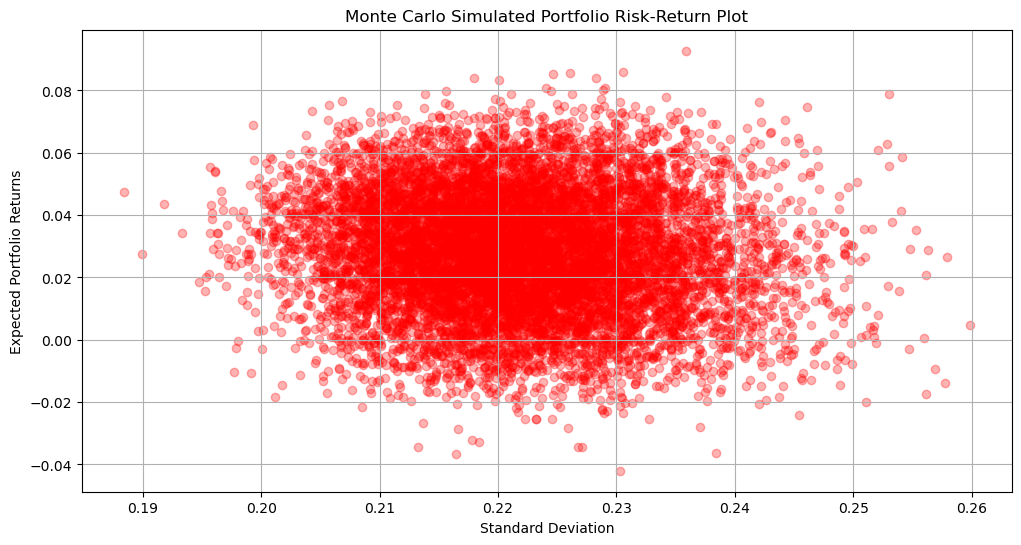

In [15]:
#Plot the portfolio standard deviation in the x-axis and the expected portfolio return on the y-axis

plt.figure(figsize=(12,6))

plt.scatter(portfolios['Volatility'], portfolios['Return'], alpha=0.3, color='red')

plt.xlabel("Standard Deviation")
plt.ylabel("Expected Portfolio Returns")
plt.title('Monte Carlo Simulated Portfolio Risk-Return Plot')

plt.grid(True)
plt.show()


In [17]:
from scipy.optimize import minimize

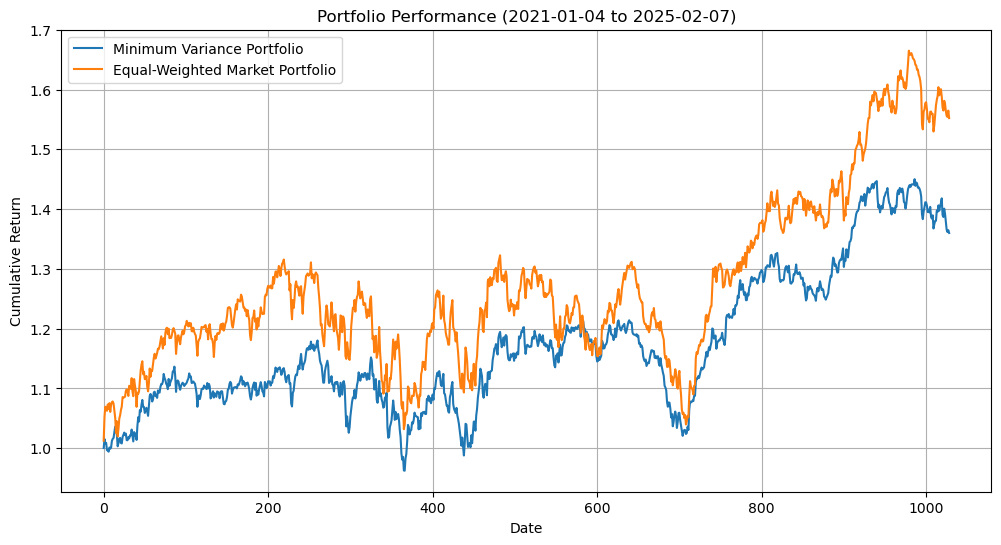

In [18]:
# Use full date range for performance comparison
full_df = df.loc[(df.index >= '2021-01-04') & (df.index <= '2025-02-07')]

# Subset to your selected 20 tickers
tickers = summary.index.tolist()
close_prices = full_df.loc[:, [('Close', ticker) for ticker in tickers]]
close_prices.columns = [ticker for (_, ticker) in close_prices.columns]

# Drop any missing values (ensure consistent shape)
close_prices = close_prices.dropna()

# Calculate daily returns
returns = close_prices.pct_change().dropna()

# Annualized covariance matrix
cov_matrix = returns.cov() * 252

# OPTIMIZATION
n = len(tickers)

def portfolio_variance(weights, cov_matrix):
    return 0.5 * np.dot(weights.T, np.dot(cov_matrix, weights))

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Bounds: allow shorting or restrict to (0, 1)
bounds = [(0, 1) for _ in range(n)]  # long-only

# Initial guess (equal weights)
init_guess = np.array([1/n] * n)

# Optimize
result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP',
                  bounds=bounds, constraints=constraints)

min_var_weights = result.x

# PERFORMANCE COMPARISON

# Compute cumulative returns of min-variance portfolio
min_var_returns = np.dot(returns, min_var_weights)
min_var_cum = (1 + min_var_returns).cumprod()

# Compare to equal-weighted market portfolio
market_weights = np.array([1/n] * n)
market_returns = np.dot(returns, market_weights)
market_cum = (1 + market_returns).cumprod()

# Plot the performance
plt.figure(figsize=(12, 6))
plt.plot(min_var_cum, label='Minimum Variance Portfolio')
plt.plot(market_cum, label='Equal-Weighted Market Portfolio')
plt.title('Portfolio Performance (2021-01-04 to 2025-02-07)')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()
